In [ ]:
import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict
from pyprep.find_noisy_channels import NoisyChannels

# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
from functions import preprocess, preICA


subject = 601
# Load the bridged channels data
with open(os.path.join(workspace_root, 'results', 'bridged_channels_analysis.pkl'), "rb") as f:
    all_bridged_channels = pickle.load(f)
    bridged_channels= all_bridged_channels[5][subject] # either 5 or 16 ; 16 is a stricter threshold
print('Bridged channels:', bridged_channels['bridged_ch_names'])
with open(os.path.join(workspace_root, 'results', 'bad_channels_detected.pkl'), "rb") as f:
    all_bads = pickle.load(f)
    
bads_channel= all_bads[subject]['channel_names']
bad_trials= all_bads[subject]['trial_numbers']
print('Bad channels:', bads_channel)
print('bad trials:', bad_trials)



Bridged channels: ['A2', 'A3', 'D3', 'D4', 'C8', 'C9', 'D19', 'D20', 'B22', 'B23', 'C28', 'C29', 'B31', 'B32']
Bad channels: ['D29', 'B27']
bad trials: [57, 58, 59, 55, 106]


In [ ]:
import sys
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict
from pyprep.find_noisy_channels import NoisyChannels

# Add the workspace root to the Python path
workspace_root = os.path.abspath("..")
if workspace_root not in sys.path:
    sys.path.append(workspace_root)
from functions import preprocess, preICA

id = 601
prep = preICA(id)

In [2]:
# compute the ICA
ica = mne.preprocessing.ICA(n_components = None, method='fastica', max_iter='auto')
ica.fit(prep, picks = 'eeg', decim = 3)
ICA_path = os.path.join(workspace_root, 'Data', f'S{id}_ica.fif')
ica.save(ICA_path)

Fitting ICA to data using 126 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 120 components
Fitting ICA took 134.1s.
Writing ICA solution to c:\Users\gmoha\Downloads\git\preprocessing_pipline\Data\S601_ica.fif...


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,561 iterations on raw data (42528 samples)
ICA components,120
Available PCA components,126
Channel types,eeg
ICA components marked for exclusion,—


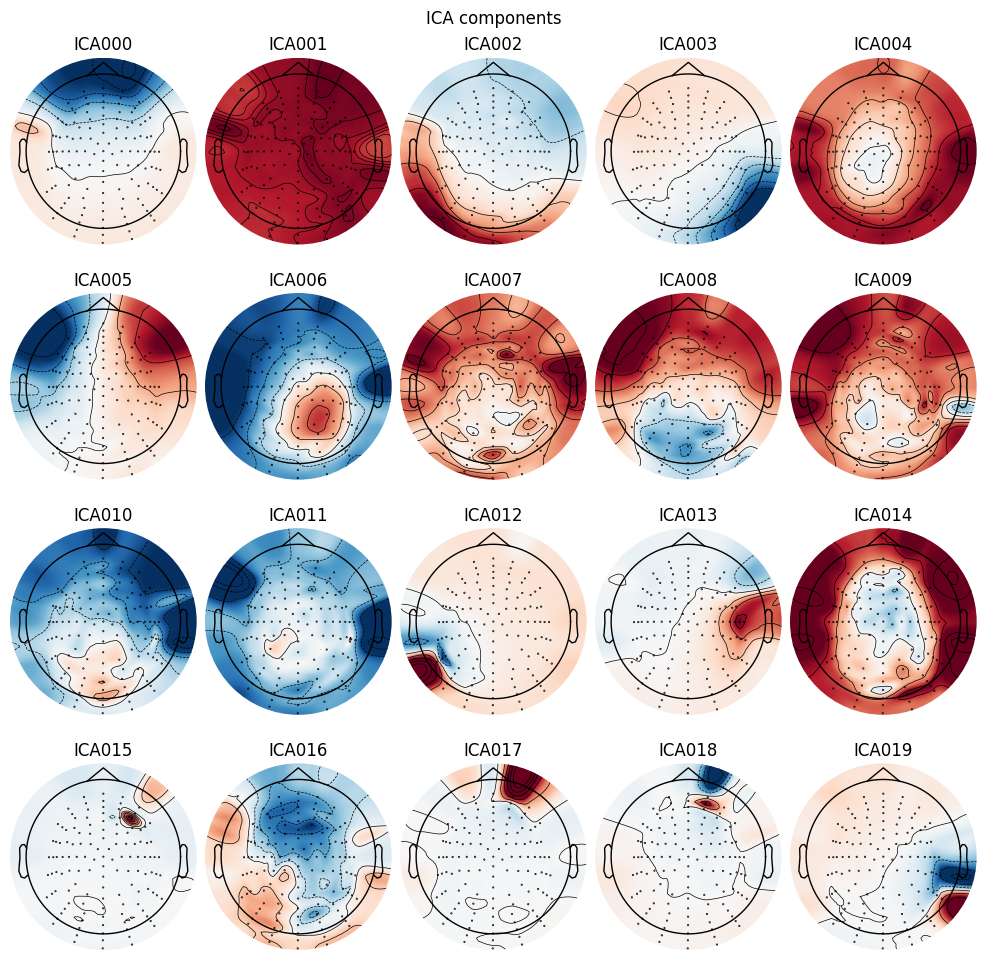

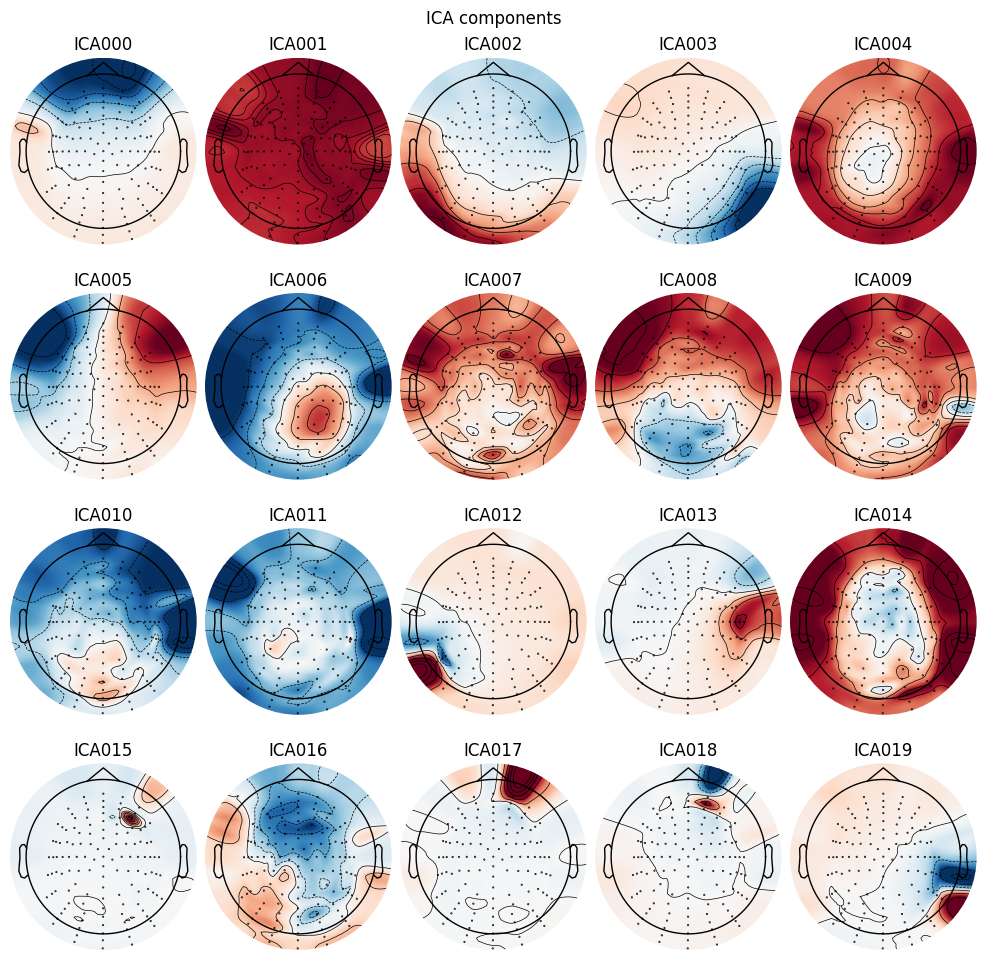

In [5]:
# plot the ICA components
ica.plot_components(picks=range(0, 20), ch_type='eeg', title='ICA components', show=True)

In [ ]:
with open(os.path.join( workspace_root, 'Data', 'bad_channels_detected.pkl'), "rb") as f:
    all_bads = pickle.load(f)

bads_channel= all_bads[id]['channel_names']
bad_trials= all_bads[id]['trial_numbers']